In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 
                'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

df = df.rename(columns=column_names)


In [3]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


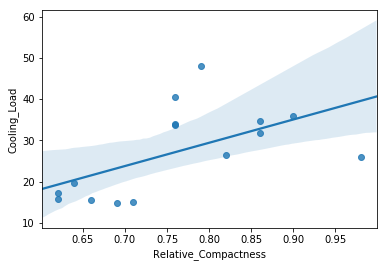

In [4]:
# select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']]\
                       .sample(15)#, random_state=2)
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load",
            data=simple_linear_reg_df)

#  EDA

In [25]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [66]:
# Unique records, Missing data
for column in df.columns:
    input_ = df[column].unique()
    if (df[column].dtype == np.object) and (input_.size <= 10):
        print("{:<32s}".format(column), input_)
#         print("test".rjust(37), '\n')
    else:
        input_ = str(input_.size) + " unique records"
        print("{:<32s}".format(column), input_)
    print("{:>32s}".format(' '),df[column].isnull().sum(), "missing data")
    print('-'*60)

Relative_Compactness             12 unique records
                                 0 missing data
------------------------------------------------------------
Surface_Area                     12 unique records
                                 0 missing data
------------------------------------------------------------
Wall_Area                        7 unique records
                                 0 missing data
------------------------------------------------------------
Roof_Area                        4 unique records
                                 0 missing data
------------------------------------------------------------
Overall_Height                   2 unique records
                                 0 missing data
------------------------------------------------------------
Orientation                      4 unique records
                                 0 missing data
------------------------------------------------------------
Glazing_Area                     4 unique re

In [78]:
df.Roof_Area.unique().size

4

In [69]:
print("There are", df.duplicated().sum(), "duplicated records")

There are 0 duplicated records


In [5]:
def range_category(column):
    input_ = df[column]
    if input_.dtype == np.object:
        if input_.unique().size <=10:
            output = ','.join(map(str, input_.unique()))
        else:
            output = f"{input_.unique().size:,} unique records"
        return output
    
    else:
        min_ = df[column].min()
        max_ = df[column].max()
        range_ = max_ - min_
        output = f"{min_:,.1f} -- {max_:,.1f} ({range_:,.1f})"
        return output

In [6]:
data_types = df.dtypes.to_frame().rename(columns={0:"Data type"})
data_types['range'] = [range_category(column) for 
                                  column in df.columns]
data_types['unique values'] = [df[column].unique().size for column in df.columns]
data_types

,Data type,range,unique values
Relative_Compactness,float64,0.6 -- 1.0 (0.4),12
Surface_Area,float64,514.5 -- 808.5 (294.0),12
Wall_Area,float64,245.0 -- 416.5 (171.5),7
Roof_Area,float64,110.2 -- 220.5 (110.2),4
Overall_Height,float64,3.5 -- 7.0 (3.5),2
Orientation,int64,2.0 -- 5.0 (3.0),4
Glazing_Area,float64,0.0 -- 0.4 (0.4),4
Glazing_Area_Distribution,int64,0.0 -- 5.0 (5.0),6
Heating_Load,float64,6.0 -- 43.1 (37.1),587
Cooling_Load,float64,10.9 -- 48.0 (37.1),636


In [84]:
# def y_index(col, func, group):
#     y_index = fuel_data.groupby(group)[col].apply(func).sort_values().index

#     return y_index

In [12]:
pd.Index(map(str, y_indx))

Index(['0.98', '0.9', '0.86', '0.82', '0.79', '0.76', '0.74', '0.71', '0.69',
       '0.66', '0.64', '0.62'],
      dtype='object')

In [18]:
df_samp.dtypes

Relative_Compactness     object
Heating_Load            float64
dtype: object

In [23]:
df_samp.groupby('Relative_Compactness').Heating_Load.count().index

Index(['0.62', '0.64', '0.66', '0.69', '0.71', '0.74', '0.76', '0.79', '0.82',
       '0.86', '0.9', '0.98'],
      dtype='object', name='Relative_Compactness')

In [ ]:
np.mean

In [24]:
# plot mean of heating load (grouped) by different variables. 
# Then do a subplot for cooling load

# y_indx = y_index('Heating_Load', np.mean, 'Relative_Compactness')
# y_indx = df.Relative_Compactness.unique()

df_samp = df[['Relative_Compactness', 'Heating_Load']]
df_samp.Relative_Compactness = df_samp.Relative_Compactness.astype(str)

plt.figure(figsize=(10,5))
axes = sns.pointplot(y='Relative_Compactness',
                     x = 'Heating_Load',
#                      hue = (fuel_data.report_year <= 2005).astype(str).replace({'True':'before 2006',
#                                                                                 'False':'as from 2006'
#                                                                                }),
                     data = df_samp,
                     ci=None,
                     join=True,
#                      order=y_indx,
                     estimator= np.mean#lambda arr: np.mean(arr),
#                      size = lambda arr: arr.median()
                    )
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

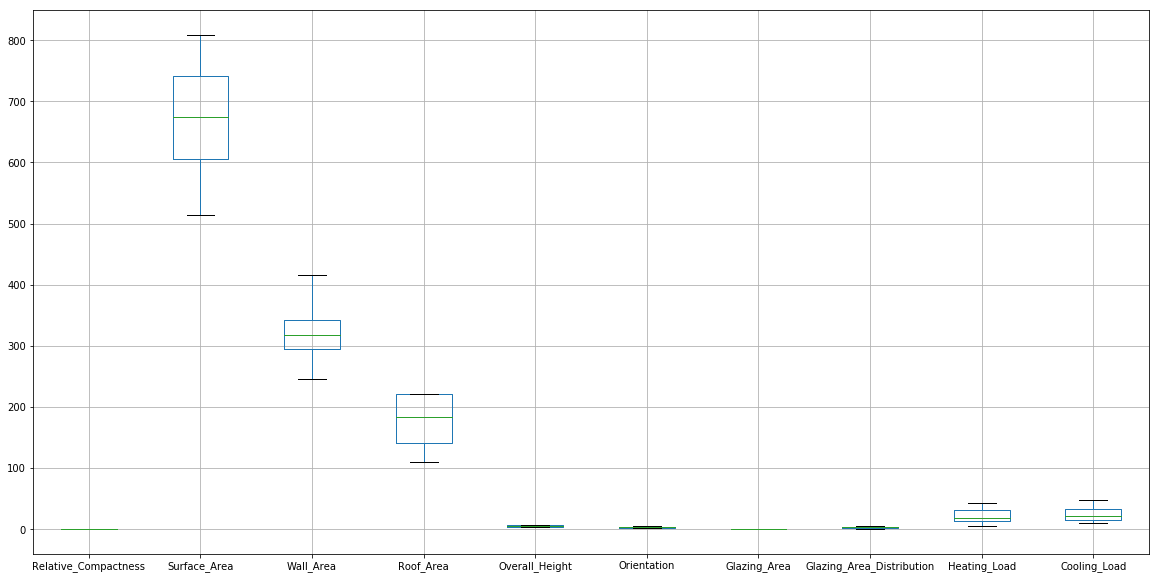

In [28]:
plt.figure(figsize=(20,10))
df.boxplot()

In [26]:
!howdoi boxplot pandas

filtered_df = df[(df['PART'] == 1) & (df['J'] == 3) & (df['P'] == 50)]
filtered_df.boxplot(column = 'AVG', by = 'METHOD', patch_artist = True)


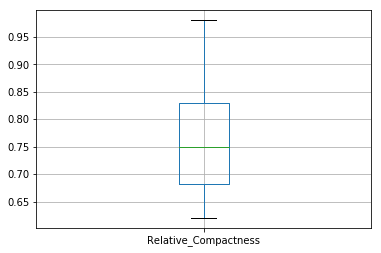

In [32]:
df.Relative_Compactness.to_frame().boxplot()

In [52]:
column = iter(df.columns)

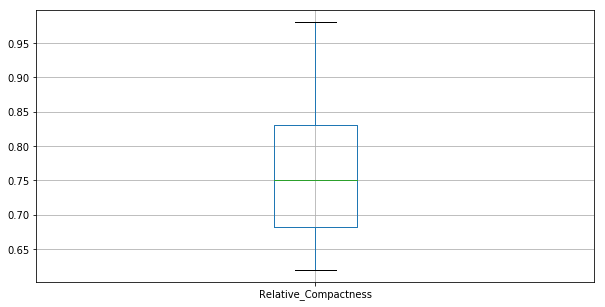

In [53]:
df.boxplot(column=next(column), figsize=(10,5), grid=True);

In [6]:
!howdoi regression matrix plot matplotlib

import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats

xData = numpy.array([1.1, 2.2, 3.3, 4.4, 5.0, 6.6, 7.7])
yData = numpy.array([1.1, 20.2, 30.3, 40.4, 50.0, 60.6, 70.7])


def func(x, a, b, c): # simple quadratic example
    return (a * numpy.square(x)) + b * x + c


initialParameters = numpy.array([1.0, 1.0, 1.0])

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()


##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figs

In [ ]:
g = sns.PairGrid(df)

In [39]:
df.boxplot?

# TESTING ASSUMPTIONS OF REGRESSION

### 1. Linearity: 
<pre>The relationship btw the variables is linear such that a straight line is the best line of fit</pre>

### 2. Homscedasticity